<a href="https://colab.research.google.com/github/fadillarizalul/thesis-alzheimer/blob/main/dummy_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##set up dan inisialisasi

```
cats_and_dogs
|__ train:
    |______ cats: [cat.0.jpg, cat.1.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg ...]
|__ validation:
    |______ cats: [cat.2000.jpg, cat.2001.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg ...]
|__ test: [1.jpg, 2.jpg ...]
```

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# URL = 'https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip'
# path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=URL, extract=True)

!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
!unzip cats_and_dogs.zip

PATH = os.path.join(os.path.dirname('cats_and_dogs.zip'), 'cats_and_dogs')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

##augmentasi dan split data

In [14]:
# Variables for pre-processing and training.
epochs = 30
batch = 128
height = 150
width = 150
dim = (height, width)
scale = 1.0 / 255.0

In [4]:
training_images = ImageDataGenerator(rescale=scale,
                                     rotation_range=90,
                                     width_shift_range=0.3,
                                     height_shift_range=0.3,
                                     brightness_range=(0.5, 1.5),
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True)

validation_images = ImageDataGenerator(rescale=scale)
testing_images = ImageDataGenerator(rescale=scale)

training_data = \
    training_images.flow_from_directory(batch_size=batch,
                                        directory=train_dir,
                                        target_size=dim,
                                        class_mode='binary')
validation_data = \
    validation_images.flow_from_directory(batch_size=batch,
                                          target_size=dim,
                                          directory=validation_dir)
testing_data = \
    testing_images.flow_from_directory(batch_size=batch,
                                       target_size=dim,
                                       directory=PATH,
                                       classes=['test'],
                                       shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


##model architecture

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(metrics=['accuracy'],
              optimizer='rmsprop',
              loss='binary_crossentropy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

##modelling

In [12]:
history = model.fit(x=training_data, 
                    epochs=30,
                    validation_data=validation_data,
                    verbose=1,
                    shuffle = True)

Epoch 1/30
16/16 [==============================] - 20s 1s/step - loss: 0.6599 - accuracy: 0.5915 - val_loss: 0.8142 - val_accuracy: 0.5000
Epoch 2/30
16/16 [==============================] - 19s 1s/step - loss: 0.6468 - accuracy: 0.6210 - val_loss: 0.8104 - val_accuracy: 0.5000
Epoch 3/30
16/16 [==============================] - 19s 1s/step - loss: 0.6883 - accuracy: 0.5905 - val_loss: 0.7501 - val_accuracy: 0.5000
Epoch 4/30
16/16 [==============================] - 19s 1s/step - loss: 0.6534 - accuracy: 0.6170 - val_loss: 0.7811 - val_accuracy: 0.5000
Epoch 5/30
16/16 [==============================] - 20s 1s/step - loss: 0.6224 - accuracy: 0.6420 - val_loss: 0.8970 - val_accuracy: 0.5000
Epoch 6/30
16/16 [==============================] - 19s 1s/step - loss: 0.6944 - accuracy: 0.6035 - val_loss: 0.7442 - val_accuracy: 0.5000
Epoch 7/30
16/16 [==============================] - 19s 1s/step - loss: 0.6414 - accuracy: 0.6265 - val_loss: 0.8452 - val_accuracy: 0.5000
Epoch 8/30
16/16 [==

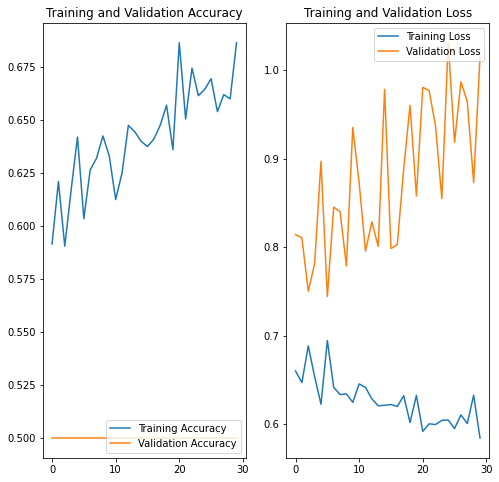

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##evaluate

In [16]:
filenames = testing_data.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(testing_data,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)

50/50 [==============================] - 0s 528us/step - loss: 0.9514 - accuracy: 0.4800
accuracy test:  0.47999998927116394


In [17]:
prediction= model.predict(validation_data, steps=np.ceil(validation_data.samples/validation_data.batch_size), verbose=2)
prediction= (prediction > 0.5)
val_labels=validation_data.classes

8/8 - 3s - 3s/epoch - 330ms/step


0.509
              precision    recall  f1-score   support

           0       0.51      0.54      0.52       500
           1       0.51      0.48      0.49       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000



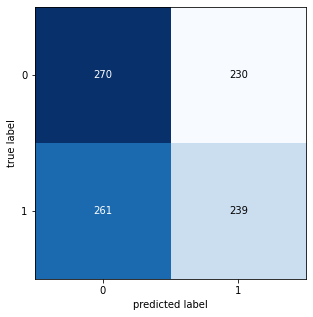

In [18]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

cm= confusion_matrix(validation_data.classes, prediction)
plot_confusion_matrix(cm, figsize=(5,5))
print(accuracy_score(validation_data.classes, prediction))
print(classification_report(validation_data.classes, prediction))

In [19]:
model.evaluate(training_data)

16/16 [==============================] - 16s 982ms/step - loss: 0.5691 - accuracy: 0.7050


[0.569139301776886, 0.7049999833106995]